### [Explore overfitting and underfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit)

The most common ways to prevent overfitting in neural networks:
- Get more training data,
- **Reduce the capacity of the network**,
- **Add weight regularization**,
- **Add dropout**,
- Data augmentation,
- Batch normalization.

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

1.12.0


#### Load the dataset

In [3]:
NUM_WORDS = 10000

In [4]:
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

In [5]:
def multi_hot_seq(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0
    return results

In [6]:
train_data = multi_hot_seq(train_data, dimension=NUM_WORDS)
test_data = multi_hot_seq(test_data, dimension=NUM_WORDS)

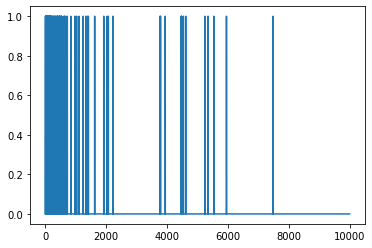

In [7]:
plt.plot(train_data[0])

#### Baseline model

In [8]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [9]:
baseline_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

In [10]:
baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [11]:
baseline_history = baseline_model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 14s - loss: 0.4427 - acc: 0.8203 - binary_crossentropy: 0.4427 - val_loss: 0.3084 - val_acc: 0.8813 - val_binary_crossentropy: 0.3084
Epoch 2/20
 - 13s - loss: 0.2251 - acc: 0.9169 - binary_crossentropy: 0.2251 - val_loss: 0.2862 - val_acc: 0.8860 - val_binary_crossentropy: 0.2862
Epoch 3/20
 - 8s - loss: 0.1670 - acc: 0.9417 - binary_crossentropy: 0.1670 - val_loss: 0.3010 - val_acc: 0.8825 - val_binary_crossentropy: 0.3010
Epoch 4/20
 - 8s - loss: 0.1335 - acc: 0.9544 - binary_crossentropy: 0.1335 - val_loss: 0.3334 - val_acc: 0.8767 - val_binary_crossentropy: 0.3334
Epoch 5/20
 - 8s - loss: 0.1120 - acc: 0.9626 - binary_crossentropy: 0.1120 - val_loss: 0.3666 - val_acc: 0.8704 - val_binary_crossentropy: 0.3666
Epoch 6/20
 - 9s - loss: 0.0924 - acc: 0.9720 - binary_crossentropy: 0.0924 - val_loss: 0.4013 - val_acc: 0.8663 - val_binary_crossentropy: 0.4013
Epoch 7/20
 - 9s - loss: 0.0761 - acc: 0.9785 - binary_crossentrop

#### Smaller model

In [12]:
small_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [13]:
small_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy', 'binary_crossentropy'])

In [14]:
small_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [15]:
small_history = small_model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 16s - loss: 0.6163 - acc: 0.7622 - binary_crossentropy: 0.6163 - val_loss: 0.5252 - val_acc: 0.8348 - val_binary_crossentropy: 0.5252
Epoch 2/20
 - 9s - loss: 0.4236 - acc: 0.8708 - binary_crossentropy: 0.4236 - val_loss: 0.3801 - val_acc: 0.8682 - val_binary_crossentropy: 0.3801
Epoch 3/20
 - 9s - loss: 0.3038 - acc: 0.8996 - binary_crossentropy: 0.3038 - val_loss: 0.3168 - val_acc: 0.8828 - val_binary_crossentropy: 0.3168
Epoch 4/20
 - 9s - loss: 0.2425 - acc: 0.9182 - binary_crossentropy: 0.2425 - val_loss: 0.2926 - val_acc: 0.8863 - val_binary_crossentropy: 0.2926
Epoch 5/20
 - 9s - loss: 0.2060 - acc: 0.9304 - binary_crossentropy: 0.2060 - val_loss: 0.2851 - val_acc: 0.8872 - val_binary_crossentropy: 0.2851
Epoch 6/20
 - 10s - loss: 0.1800 - acc: 0.9389 - binary_crossentropy: 0.1800 - val_loss: 0.2827 - val_acc: 0.8879 - val_binary_crossentropy: 0.2827
Epoch 7/20
 - 9s - loss: 0.1601 - acc: 0.9469 - binary_crossentrop

#### Larger model

In [16]:
large_model = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [17]:
large_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy', 'binary_crossentropy'])

In [18]:
large_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [19]:
large_history = large_model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 52s - loss: 0.3481 - acc: 0.8524 - binary_crossentropy: 0.3481 - val_loss: 0.2969 - val_acc: 0.8801 - val_binary_crossentropy: 0.2969
Epoch 2/20
 - 49s - loss: 0.1413 - acc: 0.9488 - binary_crossentropy: 0.1413 - val_loss: 0.3565 - val_acc: 0.8645 - val_binary_crossentropy: 0.3565
Epoch 3/20
 - 49s - loss: 0.0493 - acc: 0.9856 - binary_crossentropy: 0.0493 - val_loss: 0.4309 - val_acc: 0.8676 - val_binary_crossentropy: 0.4309
Epoch 4/20
 - 49s - loss: 0.0081 - acc: 0.9990 - binary_crossentropy: 0.0081 - val_loss: 0.5634 - val_acc: 0.8709 - val_binary_crossentropy: 0.5634
Epoch 5/20
 - 49s - loss: 9.2941e-04 - acc: 1.0000 - binary_crossentropy: 9.2941e-04 - val_loss: 0.6577 - val_acc: 0.8713 - val_binary_crossentropy: 0.6577
Epoch 6/20
 - 55s - loss: 2.4597e-04 - acc: 1.0000 - binary_crossentropy: 2.4597e-04 - val_loss: 0.7015 - val_acc: 0.8706 - val_binary_crossentropy: 0.7015
Epoch 7/20
 - 52s - loss: 1.4286e-04 - acc: 1.

#### Plot histories

In [20]:
def plot(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16, 10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key], ':', label=name.title()+' Validation')
        plt.plot(history.epoch, history.history[key], label=name.title()+' Train', color=val[0].get_color())
        
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_', ' ').title())
    plt.xlim(0, max(history.epoch))
    plt.legend()

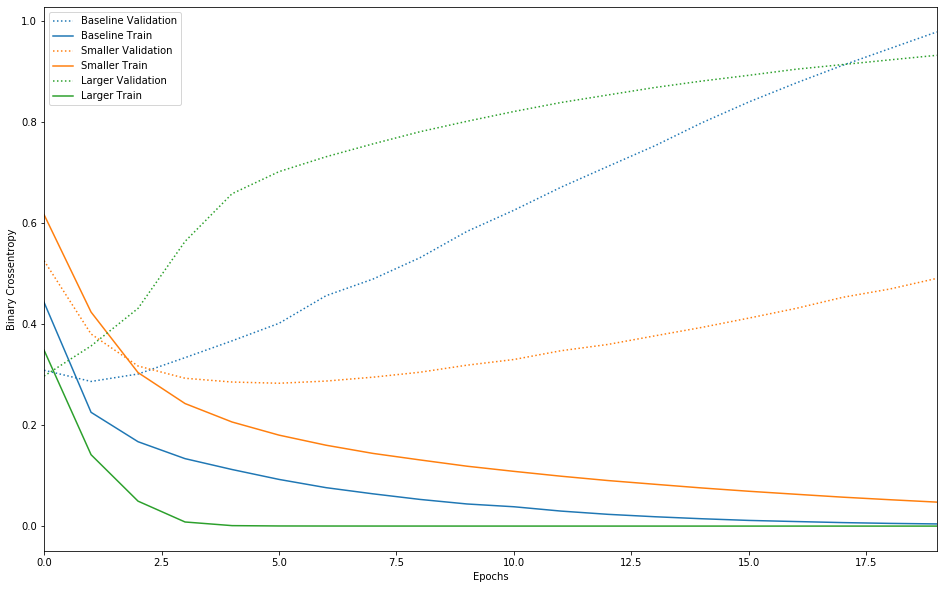

In [21]:
plot([('baseline', baseline_history), ('smaller', small_history), ('larger', large_history)])

#### Weigh regularization

In [22]:
l2_model = keras.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001), activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001), activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [23]:
l2_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

In [24]:
l2_model_history = l2_model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 28s - loss: 0.5016 - acc: 0.8120 - binary_crossentropy: 0.4593 - val_loss: 0.3687 - val_acc: 0.8796 - val_binary_crossentropy: 0.3232
Epoch 2/20
 - 12s - loss: 0.2971 - acc: 0.9130 - binary_crossentropy: 0.2476 - val_loss: 0.3362 - val_acc: 0.8875 - val_binary_crossentropy: 0.2841
Epoch 3/20
 - 12s - loss: 0.2527 - acc: 0.9314 - binary_crossentropy: 0.1986 - val_loss: 0.3406 - val_acc: 0.8859 - val_binary_crossentropy: 0.2850
Epoch 4/20
 - 10s - loss: 0.2298 - acc: 0.9406 - binary_crossentropy: 0.1727 - val_loss: 0.3541 - val_acc: 0.8819 - val_binary_crossentropy: 0.2962
Epoch 5/20
 - 10s - loss: 0.2181 - acc: 0.9461 - binary_crossentropy: 0.1587 - val_loss: 0.3660 - val_acc: 0.8790 - val_binary_crossentropy: 0.3057
Epoch 6/20
 - 10s - loss: 0.2059 - acc: 0.9508 - binary_crossentropy: 0.1451 - val_loss: 0.3821 - val_acc: 0.8750 - val_binary_crossentropy: 0.3210
Epoch 7/20
 - 10s - loss: 0.1995 - acc: 0.9537 - binary_crosse

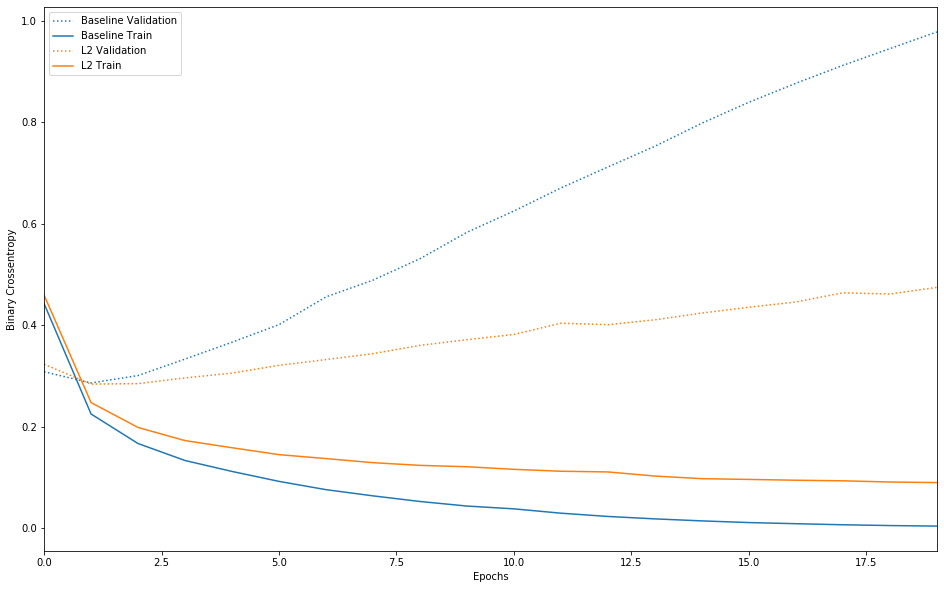

In [25]:
plot([('baseline', baseline_history), ('l2', l2_model_history)])

#### Dropout

In [26]:
dpt_model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [27]:
dpt_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

In [28]:
dpt_model_history = dpt_model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 27s - loss: 0.6366 - acc: 0.6220 - binary_crossentropy: 0.6366 - val_loss: 0.4959 - val_acc: 0.8526 - val_binary_crossentropy: 0.4959
Epoch 2/20
 - 11s - loss: 0.4686 - acc: 0.7984 - binary_crossentropy: 0.4686 - val_loss: 0.3408 - val_acc: 0.8783 - val_binary_crossentropy: 0.3408
Epoch 3/20
 - 13s - loss: 0.3620 - acc: 0.8680 - binary_crossentropy: 0.3620 - val_loss: 0.2894 - val_acc: 0.8873 - val_binary_crossentropy: 0.2894
Epoch 4/20
 - 14s - loss: 0.2892 - acc: 0.8987 - binary_crossentropy: 0.2892 - val_loss: 0.2739 - val_acc: 0.8898 - val_binary_crossentropy: 0.2739
Epoch 5/20
 - 13s - loss: 0.2490 - acc: 0.9169 - binary_crossentropy: 0.2490 - val_loss: 0.2740 - val_acc: 0.8876 - val_binary_crossentropy: 0.2740
Epoch 6/20
 - 12s - loss: 0.2200 - acc: 0.9263 - binary_crossentropy: 0.2200 - val_loss: 0.2859 - val_acc: 0.8861 - val_binary_crossentropy: 0.2859
Epoch 7/20
 - 13s - loss: 0.1909 - acc: 0.9381 - binary_crosse

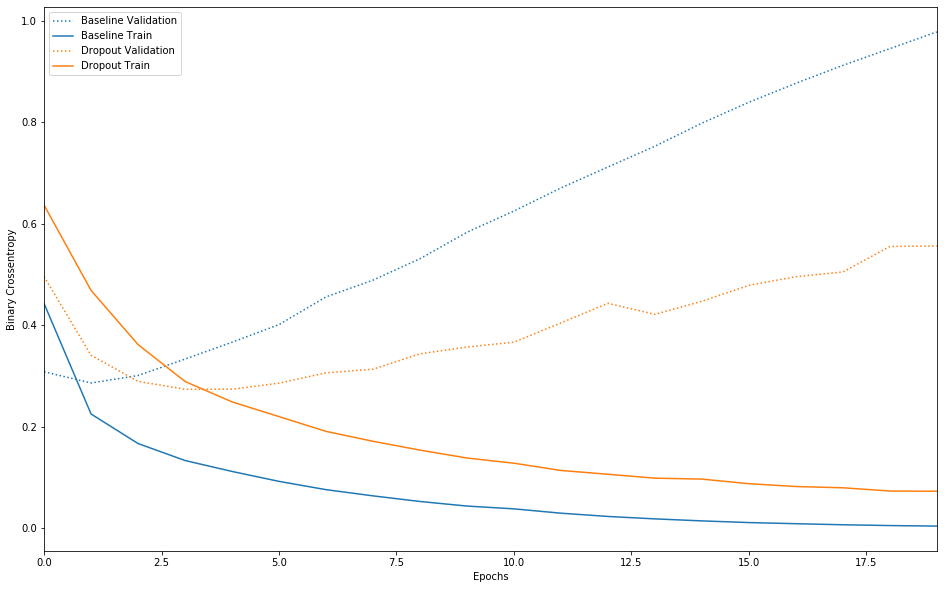

In [29]:
plot([('baseline', baseline_history), ('dropout', dpt_model_history)])